In [1]:
%load_ext autoreload
%autoreload 2 

import numpy as np
%matplotlib inline


In [2]:
# from re1_utils.camera import get_rs_extrinsic_mat
# extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
from re1_utils.camera import get_rs_intrinsic_mat
intrinsic_mat = get_rs_intrinsic_mat()
print(intrinsic_mat)
inv_intrinsic_mat = np.linalg.inv(intrinsic_mat)
print(inv_intrinsic_mat)
from re1_utils.camera import get_rs_extrinsic_mat
inv_extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
print(inv_extrinsic_mat)


[[606.46295166   0.         323.97521973]
 [  0.         606.402771   234.81144714]
 [  0.           0.           1.        ]]
[[ 0.00164891  0.         -0.53420447]
 [ 0.          0.00164907 -0.38722027]
 [ 0.          0.          1.        ]]


[ERROR] [pimu]: Transport RX Error on RPC_GET_BLOCK 0 0 106
[ERROR] [pimu]: TransportError: /dev/hello-pimu : 


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 0.99934965 -0.03068156  0.01894536  0.01275059]
 [ 0.01946929  0.01686887 -0.99966814  0.0166363 ]
 [ 0.03035179  0.99938685  0.01745525  1.22929639]
 [ 0.          0.          0.          1.        ]]


In [15]:
from POI.object_of_interest import OOI
pred =np.array( 
[[        332,         464,         381,         596,     0.88139,          39],
 [        201,         454,         245,         599,     0.86773,          39],
 [        168,         236,         204,         346,     0.50883,          39]]
)
depths = [1.308000087738037, 1.249000072479248, 1.3020000457763672]
all_objects = []
for i in range(pred.shape[0]):
    coord = pred[i, :]
    obj = OOI(
        img_coord = np.array([(coord[2]+coord[0])/2,(coord[3]+coord[1])/2]), 
        depth = depths[i],
        obj_class = int(coord[-1]),
        obj_atributes = 'None', 
        bbox = ((coord[0],coord[1]),(coord[2],coord[3])),
        conf_score = coord[4],
        eid = i
    )
    all_objects.append(obj)

In [16]:
landmarks = {'locations': {}, 'objects': {}}
for i, object in enumerate(all_objects):
    landmarks['objects'][i] = object
    landmarks['objects'][i].set_cam_coord(inv_intrinsic_mat)
    landmarks['objects'][i].set_world_coord(inv_extrinsic_mat)

In [17]:
for i, object in enumerate(all_objects):
    print(landmarks['objects'][i].obj_name, landmarks['objects'][i].img_coord[:-1])
    print(landmarks['objects'][i].cam_coord,landmarks['objects'][i].base_coord)
    
    #X seems to be horizontal to the left
    #Y seems to be depth into the camera as positive
    #Z seems to be height, positive as upwards

bottle [356.5 530. ]
[0.07014842 0.63671651 1.30800009] [ 0.08809845 -1.27882328  1.89058309]
bottle [223.  526.5]
[-0.20795674  0.6007872   1.24900007] [-0.18984124 -1.22586345  1.84520497]
bottle [186. 291.]
[-0.29621553  0.12064176  1.30200005] [-0.26230692 -1.28866368  1.36360024]


In [18]:
from planning.path_planner import PathPlanner
path_planner = PathPlanner(landmark_dict=landmarks)


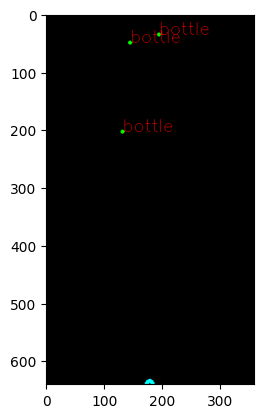

In [19]:
path_planner.viz(plane_type='xz')


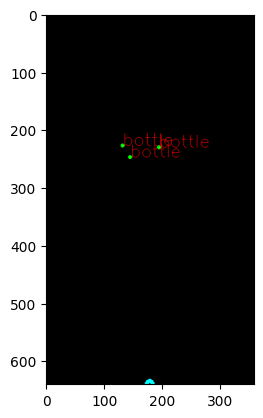

In [20]:
path_planner.viz(plane_type='xy')